In [3]:
import numpy as np
import pandas as pd  #data processing csv file
import matplotlib.pyplot as plt #for plotting graph
import seaborn as sns #for plot interactive graph
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
%matplotlib inline

In [4]:
#DATA SOURCE : KAGGLE 
data= pd.read_csv('train.csv')  
data.head()  



,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


In [6]:
data.shape  #checking rows and features

(550068, 12)

In [7]:
data.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
dtype: int64

In [8]:
#MISSING VALUES
#Product_Category_2            245982
#Product_Category_3            545809
#Purchase                      233599

In [9]:
data['Product_Category_2'].unique()
data.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [10]:
data['Product_Category_2'].value_counts()

8.0     64088
14.0    55108
2.0     49217
16.0    43255
15.0    37855
5.0     26235
4.0     25677
6.0     16466
11.0    14134
17.0    13320
13.0    10531
9.0      5693
12.0     5528
10.0     3043
3.0      2884
18.0     2770
7.0       626
Name: Product_Category_2, dtype: int64

In [11]:
data['Product_Category_2'].mode()[0]

8.0

In [12]:
## Replace the missing values with mode
data['Product_Category_2']=data['Product_Category_2'].fillna(data['Product_Category_2'].mode()[0])

In [13]:
#checking null values
data['Product_Category_2'].isnull().sum()

0

In [14]:
## Product_category 3 replace missing values
data['Product_Category_3'].unique()

array([nan, 14., 17.,  5.,  4., 16., 15.,  8.,  9., 13.,  6., 12.,  3.,
       18., 11., 10.])

In [15]:
data['Product_Category_3'].value_counts()

16.0    32636
15.0    28013
14.0    18428
17.0    16702
5.0     16658
8.0     12562
9.0     11579
12.0     9246
13.0     5459
6.0      4890
18.0     4629
4.0      1875
11.0     1805
10.0     1726
3.0       613
Name: Product_Category_3, dtype: int64

In [16]:
## Replace the missing values with mode
data['Product_Category_3']=data['Product_Category_3'].fillna(data['Product_Category_3'].mode()[0])

In [17]:
data.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8.0,16.0,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,8.0,16.0,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,16.0,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,8.0,16.0,7969


In [18]:
#userid is not neccessary hence droping userid from the dataset
data.drop(['User_ID'],axis=1,inplace=True)

In [19]:
data.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,F,0-17,10,A,2,0,3,8.0,16.0,8370
1,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,P00087842,F,0-17,10,A,2,0,12,8.0,16.0,1422
3,P00085442,F,0-17,10,A,2,0,12,14.0,16.0,1057
4,P00285442,M,55+,16,C,4+,0,8,8.0,16.0,7969


In [20]:
#Now we have some categorical data , handling categorical data

In [21]:
#HAndling categorical data for Gender
data['Gender']=data['Gender'].map({'F':0,'M':1})
data.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,0,0-17,10,A,2,0,3,8.0,16.0,8370
1,P00248942,0,0-17,10,A,2,0,1,6.0,14.0,15200
2,P00087842,0,0-17,10,A,2,0,12,8.0,16.0,1422
3,P00085442,0,0-17,10,A,2,0,12,14.0,16.0,1057
4,P00285442,1,55+,16,C,4+,0,8,8.0,16.0,7969


In [22]:
## Handle categorical data for Age
data['Age'].unique()

array(['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25'],
      dtype=object)

In [23]:
from sklearn import preprocessing
 
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
 
# Encode labels in column 'species'.
data['Age']= label_encoder.fit_transform(data['Age'])
 
data['Age'].unique()

array([0, 6, 2, 4, 5, 3, 1])

In [24]:
data.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,0,0,10,A,2,0,3,8.0,16.0,8370
1,P00248942,0,0,10,A,2,0,1,6.0,14.0,15200
2,P00087842,0,0,10,A,2,0,12,8.0,16.0,1422
3,P00085442,0,0,10,A,2,0,12,14.0,16.0,1057
4,P00285442,1,6,16,C,4+,0,8,8.0,16.0,7969


In [25]:
#handeling categorical data for city
data_city=pd.get_dummies(data['City_Category'],drop_first=True)

In [26]:
data_city.head()

,B,C
0,0,0
1,0,0
2,0,0
3,0,0
4,0,1


In [27]:
data=pd.concat([data,data_city],axis=1)
data.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,P00069042,0,0,10,A,2,0,3,8.0,16.0,8370,0,0
1,P00248942,0,0,10,A,2,0,1,6.0,14.0,15200,0,0
2,P00087842,0,0,10,A,2,0,12,8.0,16.0,1422,0,0
3,P00085442,0,0,10,A,2,0,12,14.0,16.0,1057,0,0
4,P00285442,1,6,16,C,4+,0,8,8.0,16.0,7969,0,1


In [28]:
#drop City Category Feature
data.drop('City_Category',axis=1,inplace=True)

In [29]:
data.head()

,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,P00069042,0,0,10,2,0,3,8.0,16.0,8370,0,0
1,P00248942,0,0,10,2,0,1,6.0,14.0,15200,0,0
2,P00087842,0,0,10,2,0,12,8.0,16.0,1422,0,0
3,P00085442,0,0,10,2,0,12,14.0,16.0,1057,0,0
4,P00285442,1,6,16,4+,0,8,8.0,16.0,7969,0,1


In [30]:
data['Stay_In_Current_City_Years'].unique()

array(['2', '4+', '3', '1', '0'], dtype=object)

In [31]:
data['Stay_In_Current_City_Years']=data['Stay_In_Current_City_Years'].str.replace('+','')

C:\Users\User\AppData\Local\Temp\ipykernel_8276\1369221623.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  data['Stay_In_Current_City_Years']=data['Stay_In_Current_City_Years'].str.replace('+','')


In [32]:
data.head()

,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,P00069042,0,0,10,2,0,3,8.0,16.0,8370,0,0
1,P00248942,0,0,10,2,0,1,6.0,14.0,15200,0,0
2,P00087842,0,0,10,2,0,12,8.0,16.0,1422,0,0
3,P00085442,0,0,10,2,0,12,14.0,16.0,1057,0,0
4,P00285442,1,6,16,4,0,8,8.0,16.0,7969,0,1


In [33]:
data['Stay_In_Current_City_Years']=data['Stay_In_Current_City_Years'].astype(int)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Product_ID                  550068 non-null  object 
 1   Gender                      550068 non-null  int64  
 2   Age                         550068 non-null  int32  
 3   Occupation                  550068 non-null  int64  
 4   Stay_In_Current_City_Years  550068 non-null  int32  
 5   Marital_Status              550068 non-null  int64  
 6   Product_Category_1          550068 non-null  int64  
 7   Product_Category_2          550068 non-null  float64
 8   Product_Category_3          550068 non-null  float64
 9   Purchase                    550068 non-null  int64  
 10  B                           550068 non-null  uint8  
 11  C                           550068 non-null  uint8  
dtypes: float64(2), int32(2), int64(5), object(1), uint8(2)
memory usage: 38.

In [34]:
data['B']=data['B'].astype(int)
data['C']=data['C'].astype(int)

In [35]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Product_ID                  550068 non-null  object 
 1   Gender                      550068 non-null  int64  
 2   Age                         550068 non-null  int32  
 3   Occupation                  550068 non-null  int64  
 4   Stay_In_Current_City_Years  550068 non-null  int32  
 5   Marital_Status              550068 non-null  int64  
 6   Product_Category_1          550068 non-null  int64  
 7   Product_Category_2          550068 non-null  float64
 8   Product_Category_3          550068 non-null  float64
 9   Purchase                    550068 non-null  int64  
 10  B                           550068 non-null  int32  
 11  C                           550068 non-null  int32  
dtypes: float64(2), int32(4), int64(5), object(1)
memory usage: 42.0+ MB


<Axes: xlabel='Occupation', ylabel='Purchase'>

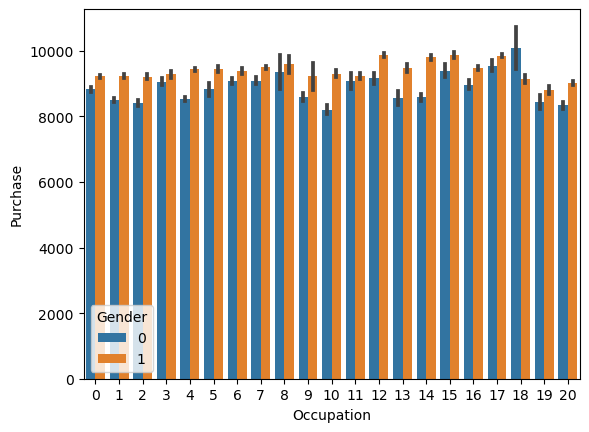

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.barplot(x='Occupation',
            y='Purchase',
            hue='Gender',
            data=data)


<Axes: xlabel='Age', ylabel='Purchase'>

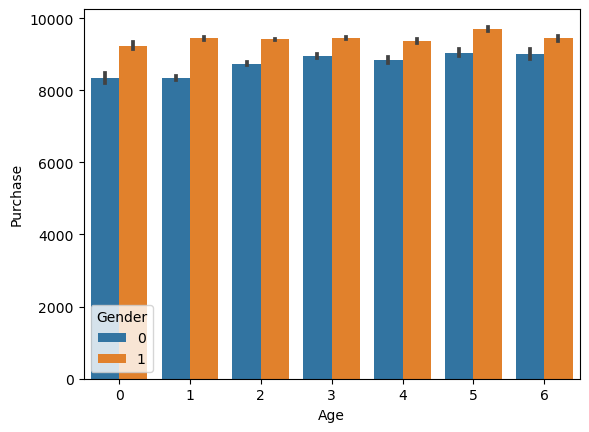

In [36]:

sns.barplot(x='Age',
            y='Purchase',
            hue='Gender',
            data=data)

<Axes: xlabel='Product_Category_1', ylabel='Purchase'>

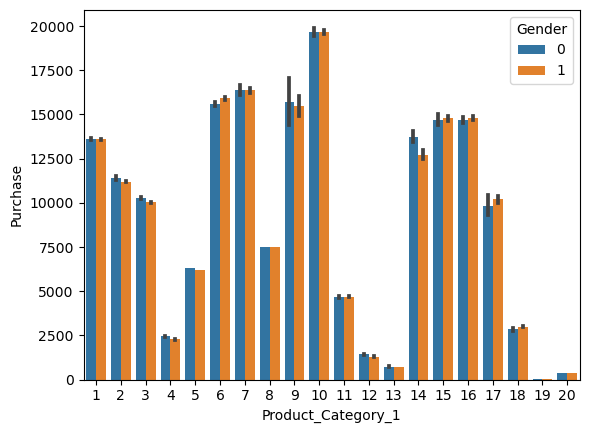

In [37]:

sns.barplot(x='Product_Category_1',
            y='Purchase',
            hue='Gender',
            data=data)

<Axes: xlabel='Product_Category_2', ylabel='Purchase'>

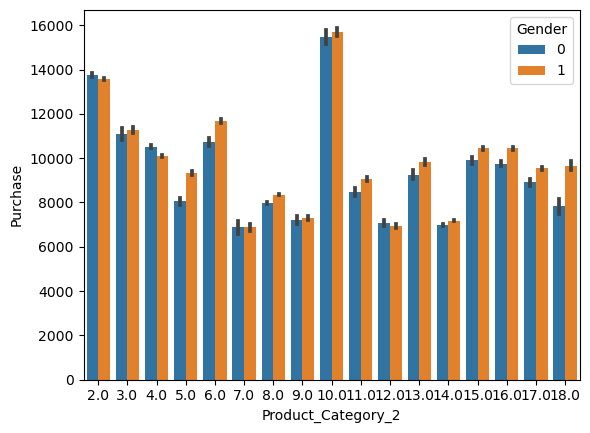

In [38]:

sns.barplot(x='Product_Category_2',
            y='Purchase',
            hue='Gender',
            data=data)

<Axes: xlabel='Product_Category_3', ylabel='Purchase'>

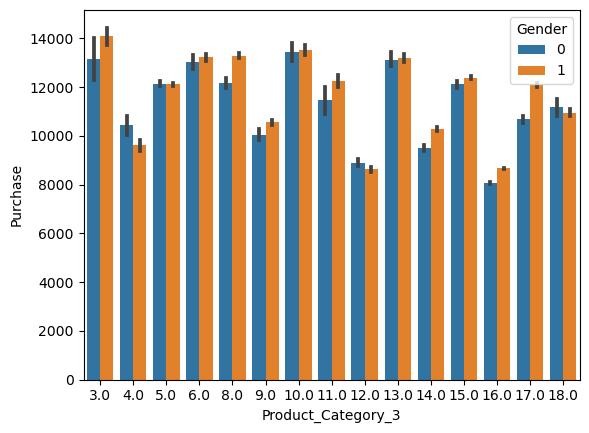

In [39]:

sns.barplot(x='Product_Category_3',
            y='Purchase',
            hue='Gender',
            data=data)

In [40]:
data.head()

,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,P00069042,0,0,10,2,0,3,8.0,16.0,8370,0,0
1,P00248942,0,0,10,2,0,1,6.0,14.0,15200,0,0
2,P00087842,0,0,10,2,0,12,8.0,16.0,1422,0,0
3,P00085442,0,0,10,2,0,12,14.0,16.0,1057,0,0
4,P00285442,1,6,16,4,0,8,8.0,16.0,7969,0,1


In [37]:
#creating x and y variable (dependent and independent feature)

X = data.drop(columns='Purchase', axis=1)
y = data['Purchase']

In [38]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
     X, y, test_size=0.33, random_state=42)

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2)

In [40]:
X_train.drop('Product_ID',axis=1,inplace=True)
X_test.drop('Product_ID',axis=1,inplace=True)

In [41]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [ ]:
svm=SVC(kernel='rbf', random_state=0)
svm.fit(X_train,y_train) 
svm_predict=svm.predict(X_test)
svm_cm=confusion_matrix(y_test,svm_predict)
svm_ac=accuracy_score(y_test,svm_predict)
print('SVM accuracy score is:', svm_ac)